In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

breast_cancer = load_breast_cancer()
logreg = LogisticRegression(max_iter=5000)

scores = cross_val_score(logreg, breast_cancer.data, breast_cancer.target)
print("Cross-validation scores: {}".format(scores))
print("Cross-validation scores mean: {}".format(scores.mean()))

Cross-validation scores: [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Cross-validation scores mean: 0.9507995652848935


In [2]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=2)

In [3]:
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg,  breast_cancer.data,  breast_cancer.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.91929825 0.9471831 ]


In [4]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n",
      cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=kfold))

Значения правильности перекрестной проверки:
 [0.96315789 0.93684211 0.95238095]


In [5]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=loo)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  569
Средняя правильность: 0.95


In [6]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.4, train_size=.6, n_splits=10)
scores = cross_val_score(logreg, breast_cancer.data, breast_cancer.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}" . format(scores))

Значения правильности перекрестной проверки:
[0.96491228 0.96052632 0.94298246 0.94736842 0.94298246 0.95614035
 0.96929825 0.97368421 0.94298246 0.95175439]


In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,breast_cancer.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

Размер обучающего набора: 426 размер тестового набора: 143
Наилучшее значение правильности: 0.93
Наилучшие значения параметров: {'C': 1, 'gamma': 0.001}


In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора: {}".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 319 размер проверочного набора: 107 размер тестового набора: 143
Лучшее значение правильности на проверочном наборе: 0.94
Наилучшие значения параметров:  {'C': 1, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.93


In [9]:
import numpy as np
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=1, gamma=0.001)

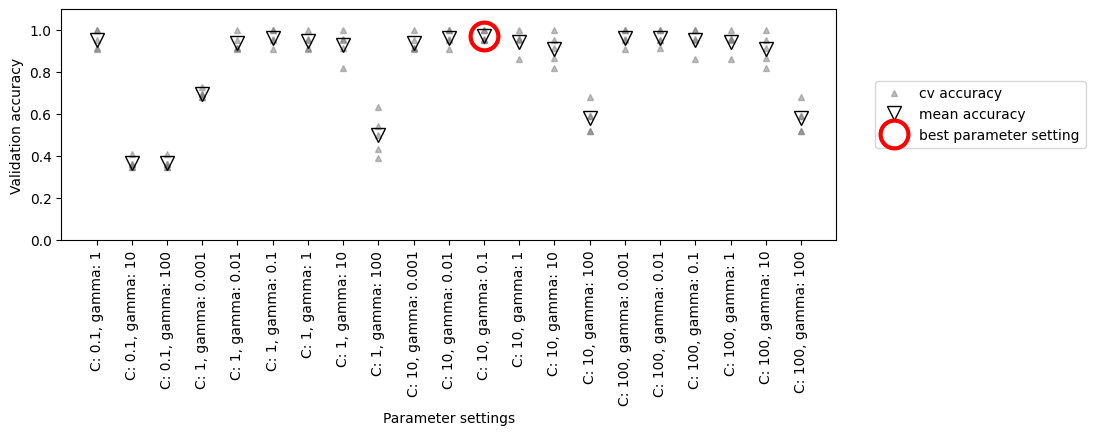

In [10]:
import mglearn

mglearn.plots.plot_cross_val_selection()

In [11]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100] 
}
print("Сетка параметров:")
print(param_grid)

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=0)

In [14]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [15]:
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

Правильность на тестовом наборе: 0.93


In [16]:
print(f"Наилучшие значения параметров: {grid_search.best_params_}")
print(f"Наилучшее значение кросс-валидации: {grid_search.best_score_:.2f}")

Наилучшие значения параметров: {'C': 1, 'gamma': 0.001}
Наилучшее значение кросс-валидации: 0.92


In [17]:
print("Наилучшая модель: \n{}".format(grid_search.best_estimator_))

Наилучшая модель: 
SVC(C=1, gamma=0.001)


In [18]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014722,0.003627,0.005735,0.002803,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
1,0.020755,0.006344,0.008550,0.005232,0.001,0.010,"{'C': 0.001, 'gamma': 0.01}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
2,0.028136,0.009169,0.010596,0.005378,0.001,0.100,"{'C': 0.001, 'gamma': 0.1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
3,0.017955,0.003064,0.009480,0.000873,0.001,1.000,"{'C': 0.001, 'gamma': 1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6
4,0.019128,0.003121,0.008339,0.000926,0.001,10.000,"{'C': 0.001, 'gamma': 10}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,6


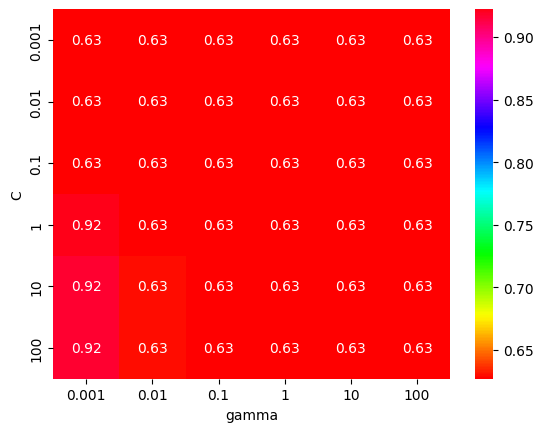

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
scores = np.array(results.mean_test_score).reshape(6, 6)
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
plt.show()

In [20]:
param_grid = [
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [21]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидационной правильности: {:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 0.1, 'kernel': 'linear'}
Наилучшее значение кросс-валидационной правильности: 0.96


In [22]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012850,0.002336,0.006618,0.001379,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
1,0.014854,0.002600,0.007519,0.001724,0.001,0.010,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
2,0.012305,0.001256,0.006250,0.001589,0.001,0.100,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
3,0.017419,0.002433,0.009516,0.002062,0.001,1.000,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
4,0.015501,0.002438,0.007519,0.001280,0.001,10.000,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
5,0.017252,0.002066,0.007823,0.001281,0.001,100.000,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
6,0.010407,0.003090,0.005083,0.000881,0.010,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
7,0.016299,0.002182,0.008260,0.001384,0.010,0.010,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
8,0.013315,0.003168,0.000999,0.001999,0.010,0.100,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12
9,0.020359,0.009614,0.010052,0.003729,0.010,1.000,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,12


In [23]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), breast_cancer.data, breast_cancer.target, cv=5)
print("Значения правильности перекрестной проверки:", scores)
print("Среднее значение правильности перекрестной проверки:", scores.mean())

Значения правильности перекрестной проверки: [0.93859649 0.92982456 0.97368421 0.92105263 0.98230088]
Среднее значение правильности перекрестной проверки: 0.9490917559385188


In [24]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    for training_samples, test_samples in outer_cv.split(X, y):
        best_params = {}
        best_score = -np.inf
        for parameters in parameter_grid:
            cv_scores = []
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))

    return np.array(outer_scores)

In [25]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(breast_cancer.data, breast_cancer.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки:", scores)

KeyboardInterrupt: 

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=0.5).fit(X_train, y_train)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=4000, centers=2, cluster_std=[7.0, 2.0], random_state=22)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.svm import SVC
svc = SVC(gamma=0.5).fit(X_train, y_train)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
import matplotlib.pyplot as plt
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='порог', fillstyle='none', c='k')
plt.plot(precision, recall, label='кривая точности-полноты')
plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label='threshold zero svc', fillstyle='none', c='k', mew=2) 
plt.plot(precision_rf, recall_rf, label='Случайный лес')
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], 'o', markersize=10, 
         label='Порог 0.5 для случайного леса', fillstyle='none', c='k', mew=2)

plt.xlabel('Точность')
plt.ylabel('Полнота')
plt.legend(loc='best')

In [ ]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print(f"Средняя точность Random Forest: {ap_rf:.3f}")
print(f"Средняя точность SVC: {ap_svc:.3f}")

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC



print(f"Метрика качества по умолчанию: {cross_val_score(SVC(), breast_cancer.data, breast_cancer.target).mean():.3f}")
explicit_accuracy = cross_val_score(SVC(), breast_cancer.data, breast_cancer.target, scoring='accuracy') 
print(f"Метрика качества явно заданная правильность: {explicit_accuracy.mean():.3f}")
roc_auc = cross_val_score(SVC(), breast_cancer.data, breast_cancer.target, scoring='roc_auc').mean()
print(f"Метрика качества AUC: {roc_auc:.3f}")


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=0)


param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)

print("Результаты поиска с использованием правильности")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекрестной проверки (правильность): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Результаты поиска с использованием AUC")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекрестной проверки (AUC): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test))) 

В ходе первой части лабораторной работы я познакомился с такими методами улучшения качества и оценки моделей, как перекрестная проверка, решетчатый поиск, метрики модели. А также попробовал применить их на дата сете breast_cancer. Также узнал почему точность модели, не всегда показывает на сколько действительно полезна данная модель в реальной жизни.

In [ ]:
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
cities = ['Bishkek', 'Osh', 'Almaty', 'Nur-Sultan', 'Tashkent']
vacation_prefs = ['sea', 'mountains', 'city']
transport_prefs = ['plane', 'train', 'bus', 'car']
target_cities = ['Antalya', 'Dubai', 'Paris', 'Bangkok', 'New York']
data = []
for _ in range(1000):
    salary = random.randint(20000, 120000)
    city = random.choice(cities)
    age = random.randint(18, 65)
    vacation_prefer = random.choice(vacation_prefs)
    transport_prefer = random.choice(transport_prefs)
    target = random.choice(target_cities)
    data.append([salary, city, age, vacation_prefer, transport_prefer, target])

columns = ['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target']
df = pd.DataFrame(data, columns=columns)

df = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer', 'target'], drop_first=True)

X = df.drop(columns=[col for col in df.columns if col.startswith('target_')])
y = df[[col for col in df.columns if col.startswith('target_')]].values.argmax(axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")
print("\nКлассификационный отчет:")
print(classification_report(y_test, y_pred))



In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100] 
}
print("Сетка параметров:")
print(param_grid)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(6, 6)
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
plt.show()

In [ ]:
param_grid = [
    {'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
]

print("List of grids:\n{}".format(param_grid))

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидационной правильности: {:.2f}".format(grid_search.best_score_))